<a href="https://colab.research.google.com/github/nataliaovandof/Regresion-Lineal/blob/main/6_Actividad_6_1_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Voy a cargar mis archivo
from google.colab import files
files.upload()

Saving California_EUA.csv to California_EUA.csv
Saving DF_Mexico.csv to DF_Mexico.csv
Saving Girona_España.csv to Girona_España.csv


In [358]:
df= pd.read_csv("DF_Mexico.csv")
california= pd.read_csv("California_EUA.csv", encoding = 'unicode_escape')
girona= pd.read_csv('Girona_España.csv', encoding = 'unicode_escape')

# Eliminar Nulos y Outliers

## México

In [359]:
df = df.dropna(how = 'all',axis = 1)
df_num = df.select_dtypes(include=['int', 'float'])
df_num = list(df_num.columns)
df_num

for i in df_num:
  df[i] = df[i].fillna(round(df[i].median(),2))

<ipython-input-359-cf911ab5acad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(round(df[i].median(),2))
<ipython-input-359-cf911ab5acad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(round(df[i].median(),2))
<ipython-input-359-cf911ab5acad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [360]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [361]:
y = df[df_num]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

df_clean = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df = df.drop(df_num[1:], axis =1)
df1 = pd.merge(df, df_clean)
df1

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.71,4.92,4.92,NaN,4.71,3.0,3.0,0.0,0.0,0.31
3,35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
4,44616,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,...,4.87,4.93,4.93,4.94,4.82,2.0,2.0,0.0,0.0,1.14
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,...,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,...,4.87,4.93,4.93,4.94,4.82,13.0,13.0,0.0,0.0,1.14


## California

In [362]:
california = california.dropna(how = 'all',axis = 1)
california_num = california.select_dtypes(include=['int', 'float'])
california_num = list(california_num.columns)
california_num

for i in california_num:
  california[i] = california[i].fillna(round(california[i].median(),2))

<ipython-input-362-d381f5331fd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california[i] = california[i].fillna(round(california[i].median(),2))
<ipython-input-362-d381f5331fd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california[i] = california[i].fillna(round(california[i].median(),2))
<ipython-input-362-d381f5331fd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [363]:
california = california.fillna(method='ffill')
california = california.fillna(method='bfill')

In [364]:
y = california[california_num]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

california_clean = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
california = california.drop(california_num[1:], axis =1)
california1 = pd.merge(california, california_clean)
california1

,ï»¿id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,...,NaN,NaN,4.78,4.67,4.67,13.0,0.0,NaN,0.0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,52859106.0,https://www.airbnb.com/rooms/52859106,06/03/2023,city scrape,The Addison by Kasa | Traditional Queen Studio,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.90,4.80,4.80,5.00,4.70,17.0,NaN,NaN,0.0,0.63
5359,52859379.0,https://www.airbnb.com/rooms/52859379,06/03/2023,city scrape,The Addison by Kasa | Premium Queen Loft,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.71,NaN,NaN,4.86,4.43,17.0,NaN,NaN,0.0,0.88
5360,52861914.0,https://www.airbnb.com/rooms/52861914,06/03/2023,city scrape,Cheerful 5-bedroom home in downtown San Francisco,Your family will be close to everything when y...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/427991063,Tripa,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.08
5361,52880170.0,https://www.airbnb.com/rooms/52880170,06/03/2023,city scrape,Casa Divisadero! Penthouse + Deck in Best Loca...,"Large 2 bedroom, 2 bathroom apartment in the h...",Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/95425780,Jules,...,4.91,5.00,4.91,4.95,4.95,1.0,1.0,0.0,0.0,1.47


## Girona

In [365]:
girona = girona.dropna(how = 'all',axis = 1)
girona_num = girona.select_dtypes(include=['int', 'float'])
girona_num = list(girona_num.columns)
girona_num

for i in girona_num:
  girona[i] = girona[i].fillna(round(girona[i].median(),2))

<ipython-input-365-55475767407b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  girona[i] = girona[i].fillna(round(girona[i].median(),2))
<ipython-input-365-55475767407b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  girona[i] = girona[i].fillna(round(girona[i].median(),2))
<ipython-input-365-55475767407b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [366]:
girona = girona.fillna(method='ffill')
girona = girona.fillna(method='bfill')

In [367]:
y = girona[girona_num]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

girona_clean = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
girona = girona.drop(girona_num[1:], axis =1)
girona1 = pd.merge(girona, girona_clean)
girona1

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1,1.205757e+06,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
2,1.212820e+06,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,7.516380e+05,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4,4.134200e+04,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,8.583870e+17,https://www.airbnb.com/rooms/858386613168601750,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/26281633,MÂª Dolors,...,4.74,4.89,4.91,4.86,4.60,34.0,34.0,0.0,0.0,0.26
21989,8.583960e+17,https://www.airbnb.com/rooms/858396134121337855,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/6351279f-294b...,https://www.airbnb.com/users/show/444428600,Alina,...,4.74,4.89,4.91,4.86,4.60,1.0,1.0,0.0,0.0,0.26
21990,8.584110e+17,https://www.airbnb.com/rooms/858410917126332945,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/491503593,Administracions Saturno,...,4.74,4.89,4.91,4.86,4.60,9.0,9.0,0.0,0.0,0.26
21991,8.584180e+17,https://www.airbnb.com/rooms/858418062773719271,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/389605038,Winahost,...,4.74,4.89,4.91,4.86,4.60,54.0,54.0,0.0,0.0,0.26


# Correlación

## México

Primero voy a quitar mis signos de pesos y mis diagonales, para poder convertirlo a un float.

In [368]:
df1.price= df1.price.replace({'\$':''}, regex = True)
df1.price= df1.price.replace({'\,':''}, regex = True)
df1['price'] = df1['price'].astype(float)

Para ambos rates, le quitamos el % para poder trabajarlo como número.

In [369]:
df1.host_acceptance_rate= df1.host_acceptance_rate.replace({'%':''}, regex = True)
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype(float)

df1.host_response_rate= df1.host_response_rate.replace({'%':''}, regex = True)
df1['host_response_rate'] = df1['host_response_rate'].astype(float)

Elegimos los 2 tipos de habitacion a analizar

In [370]:
room1df = df1[df1['room_type'] == 'Entire home/apt']
room2df = df1[df1['room_type'] == 'Private room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

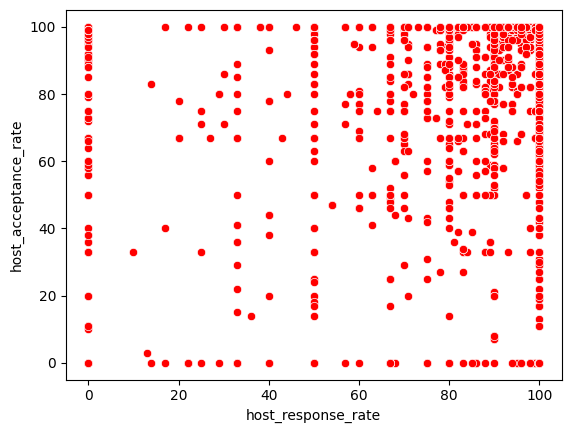

In [371]:
from turtle import color
# Entire home/apt
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=room1df)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

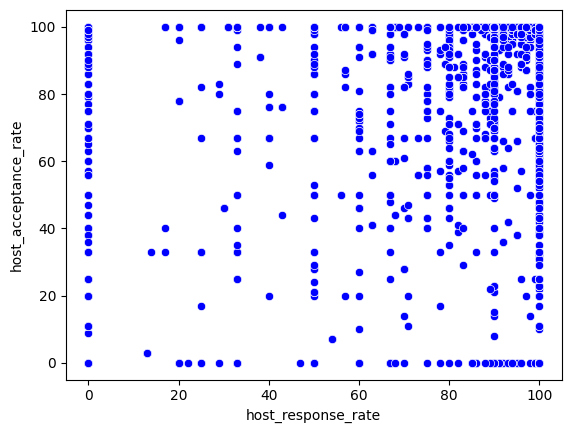

In [372]:
# Private room
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=room2df)

In [373]:
#Declaramos las variables dependientes e independientes para la regresión lineal

#Entire home/apt
Vars1_Indep= room1df[['host_response_rate']]
Var1_Dep= room1df['host_acceptance_rate']

Vars1_Indep2= room1df[['review_scores_cleanliness']]
Var1_Dep2= room1df['review_scores_location']

Vars1_Indep3= room1df[['price']]
Var1_Dep3= room1df['host_acceptance_rate']

Vars1_Indep4= room1df[['number_of_reviews']]
Var1_Dep4= room1df['availability_365']

Vars1_Indep5= room1df[['number_of_reviews']]
Var1_Dep5= room1df['host_acceptance_rate']

Vars1_Indep6= room1df[['review_scores_communication']]
Var1_Dep6= room1df['reviews_per_month']

#Private room
Vars2_Indep= room2df[['host_response_rate']]
Var2_Dep= room2df['host_acceptance_rate']

Vars2_Indep2= room2df[['review_scores_cleanliness']]
Var2_Dep2= room2df['review_scores_location']

Vars2_Indep3= room2df[['price']]
Var2_Dep3= room2df['host_acceptance_rate']

Vars2_Indep4= room2df[['number_of_reviews']]
Var2_Dep4= room2df['availability_365']

Vars2_Indep5= room2df[['number_of_reviews']]
Var2_Dep5= room2df['host_acceptance_rate']

Vars2_Indep6= room2df[['review_scores_communication']]
Var2_Dep6= room2df['reviews_per_month']

In [374]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1room1= LinearRegression()
model2room1= LinearRegression()
model3room1= LinearRegression()
model4room1= LinearRegression()
model5room1= LinearRegression()
model6room1= LinearRegression()
model1room2= LinearRegression()
model2room2= LinearRegression()
model3room2= LinearRegression()
model4room2= LinearRegression()
model5room2= LinearRegression()
model6room2= LinearRegression()


### Modelo 1 Room 1

In [375]:
model1room1.fit(X = Vars1_Indep, y = Var1_Dep)

LinearRegression()

In [376]:
model1room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.43278325]),
 'rank_': 1,
 'singular_': array([1791.03092982]),
 'intercept_': 51.779521474254764}

Modelo matermático: 0.43278325x + 51.779521474254764

In [377]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room1.score(Vars1_Indep,Var1_Dep)

0.12074770148221359

In [378]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1room1.score(X=Vars1_Indep, y=Var1_Dep)
coef_Deter1

0.12074770148221359

In [379]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.34748769975671595

### Modelo 2 Room 1

In [380]:
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'bfill')
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'ffill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'bfill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'ffill')

In [381]:

model2room1.fit(X = Vars1_Indep2, y = Var1_Dep2)

LinearRegression()

In [382]:
model2room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.14159063]),
 'rank_': 1,
 'singular_': array([16.7454726]),
 'intercept_': 4.229393020661291}

Modelo matermático: 0.14159063x + 4.229393020661291

In [383]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room1.score(Vars1_Indep2,Var1_Dep2)

0.04362154757210601

In [384]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2room1.score(X=Vars1_Indep2, y=Var1_Dep2)
coef_Deter2

0.04362154757210601

In [385]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.20885772088219773

### Modelo 3 Room 1

In [386]:
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'bfill')
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'ffill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'bfill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'ffill')

In [387]:

model3room1.fit(X = Vars1_Indep3, y = Var1_Dep3)

LinearRegression()

In [388]:
model3room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.46564596e-06]),
 'rank_': 1,
 'singular_': array([1828454.89353362]),
 'intercept_': 93.48994717179048}

Modelo matermático: 3.46564596e-06x + 93.48994717179048

In [389]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room1.score(Vars1_Indep3,Var1_Dep3)

8.069910240271483e-06

In [390]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3room1.score(X=Vars1_Indep3, y=Var1_Dep3)
coef_Deter3

8.069910240271483e-06

In [391]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.002840758743763976

### Modelo 4 Room 1

In [392]:
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'bfill')
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'ffill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'bfill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'ffill')

In [393]:

model4room1.fit(X = Vars1_Indep4, y = Var1_Dep4)

LinearRegression()

In [394]:
model4room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.31784801]),
 'rank_': 1,
 'singular_': array([3338.27395712]),
 'intercept_': 248.69257845136394}

Modelo matermático: -0.31784801x + 248.69257845136394

In [395]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room1.score(Vars1_Indep4,Var1_Dep4)

0.004755406669037954

In [396]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4room1.score(X=Vars1_Indep4, y=Var1_Dep4)
coef_Deter4

0.004755406669037954

In [397]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.06895945670492158

### Modelo 5 Room 1

In [398]:
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'bfill')
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'ffill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'bfill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'ffill')

In [399]:

model5room1.fit(X = Vars1_Indep5, y = Var1_Dep5)

LinearRegression()

In [400]:
model5room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.09696795]),
 'rank_': 1,
 'singular_': array([3338.27395712]),
 'intercept_': 91.06534674875776}

Modelo matermático: 0.09696795x + 91.06534674875776

In [401]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room1.score(Vars1_Indep5,Var1_Dep5)

0.021058728662751713

In [402]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5room1.score(X=Vars1_Indep5, y=Var1_Dep5)
coef_Deter5

0.021058728662751713

In [403]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.1451162591260942

### Modelo 6 Room 1

In [404]:
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'bfill')
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'ffill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'bfill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'ffill')

In [405]:

model6room1.fit(X = Vars1_Indep6, y = Var1_Dep6)

LinearRegression()

In [406]:
model6room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.35938029]),
 'rank_': 1,
 'singular_': array([11.71694466]),
 'intercept_': 8.201482053424714}

Modelo matermático: -1.35938029x + 8.201482053424714

In [407]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room1.score(Vars1_Indep6,Var1_Dep6)

0.013526321371483019

In [408]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6room1.score(X=Vars1_Indep6, y=Var1_Dep6)
coef_Deter6

0.013526321371483019

In [409]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.11630271437710737

### Modelo 1 Room 2

In [410]:
Vars2_Indep = Vars2_Indep.fillna(method = 'bfill')
Vars2_Indep = Vars2_Indep.fillna(method = 'ffill')
Var2_Dep = Var2_Dep.fillna(method = 'bfill')
Var2_Dep = Var2_Dep.fillna(method = 'ffill')

In [411]:

model1room2.fit(X = Vars2_Indep, y = Var2_Dep)

LinearRegression()

In [412]:
model1room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3747922]),
 'rank_': 1,
 'singular_': array([2130.80139075]),
 'intercept_': 53.24119420065673}

Modelo matermático: 0.0.3747922x + 53.24119420065673

In [413]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room2.score(Vars2_Indep,Var2_Dep)

0.11941487752518953

In [414]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model1room2.score(X=Vars2_Indep, y=Var2_Dep)
coef_Deter7

0.11941487752518953

In [415]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.345564577937597

### Modelo 2 Room 2

In [416]:
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'bfill')
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'ffill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'bfill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'ffill')

In [417]:

model2room2.fit(X = Vars2_Indep2, y = Var2_Dep2)

LinearRegression()

In [418]:
model2room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.16935891]),
 'rank_': 1,
 'singular_': array([12.34482682]),
 'intercept_': 4.107647368049235}

Modelo matermático: 0.16935891x + 4.107647368049235

In [419]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room2.score(Vars2_Indep2,Var2_Dep2)

0.07328322063139259

In [420]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model2room2.score(X=Vars2_Indep2, y=Var2_Dep2)
coef_Deter8

0.07328322063139259

In [421]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.27070873763399766

### Modelo 3 Room 2

In [422]:
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'bfill')
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'ffill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'bfill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'ffill')

In [423]:

model3room2.fit(X = Vars2_Indep3, y = Var2_Dep3)

LinearRegression()

In [424]:
model3room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.58512387e-06]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 87.3662175450093}

Modelo matermático: -4.58512387e-06x + 87.3662175450093

In [425]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room2.score(Vars2_Indep3,Var2_Dep3)

1.8379551628644464e-05

In [426]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model3room2.score(X=Vars2_Indep3, y=Var2_Dep3)
coef_Deter9

1.8379551628644464e-05

In [427]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.004287137929743392

### Modelo 4 Room 2

In [428]:
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'bfill')
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'ffill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'bfill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'ffill')

In [429]:

model4room2.fit(X = Vars2_Indep4, y = Var2_Dep4)

LinearRegression()

In [430]:
model4room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.3736975]),
 'rank_': 1,
 'singular_': array([2003.68532238]),
 'intercept_': 258.700119458428}

Modelo matermático: -0.3736975x + 258.700119458428

In [431]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room2.score(Vars2_Indep4,Var2_Dep4)

0.004365004445020415

In [432]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model4room2.score(X=Vars2_Indep4, y=Var2_Dep4)
coef_Deter10

0.004365004445020415

In [433]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.06606818027629045

### Modelo 5 Room 2

In [434]:
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'bfill')
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'ffill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'bfill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'ffill')

In [435]:
model5room2.fit(X = Vars2_Indep5, y = Var2_Dep5)

LinearRegression()

In [436]:
model5room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1703851]),
 'rank_': 1,
 'singular_': array([2003.68532238]),
 'intercept_': 84.78360415283028}

Modelo matermático: 0.1703851x + 84.78360415283028

In [437]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room2.score(Vars2_Indep5,Var2_Dep5)

0.021822961247860095

In [438]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter11=model5room2.score(X=Vars2_Indep5, y=Var2_Dep5)
coef_Deter11

0.021822961247860095

In [439]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl11=np.sqrt(coef_Deter11)
coef_Correl11

0.14772596673523614

### Modelo 6 Room 2

In [440]:
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'bfill')
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'ffill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'bfill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'ffill')

In [441]:

model6room2.fit(X = Vars2_Indep6, y = Var2_Dep6)

LinearRegression()

In [442]:
model6room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.94480212]),
 'rank_': 1,
 'singular_': array([8.3319618]),
 'intercept_': 10.600508669451163}

Modelo matermático: -1.94480212x -1.94480212

In [443]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room2.score(Vars2_Indep6,Var2_Dep6)

0.03997385142489729

In [444]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter12=model6room2.score(X=Vars2_Indep6, y=Var2_Dep6)
coef_Deter12

0.03997385142489729

In [445]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl12=np.sqrt(coef_Deter12)
coef_Correl12

0.1999346178751876

In [446]:
datos = {'Determinación': [coef_Deter1, coef_Deter2, coef_Deter3, coef_Deter4, coef_Deter5, coef_Deter6, coef_Deter7, coef_Deter8, coef_Deter9, coef_Deter10, coef_Deter11, coef_Deter12], 'Correlación': [coef_Correl1, coef_Correl2, coef_Correl3, coef_Correl4, coef_Correl5, coef_Correl6, coef_Correl7, coef_Correl8, coef_Correl9, coef_Correl10, coef_Correl11, coef_Correl12]}
mexico = pd.DataFrame(datos)
mexico

,Determinación,Correlación
0,0.120748,0.347488
1,0.043622,0.208858
2,0.000008,0.002841
3,0.004755,0.068959
4,0.021059,0.145116
5,0.013526,0.116303
6,0.119415,0.345565
7,0.073283,0.270709
8,0.000018,0.004287
9,0.004365,0.066068


## California

Primero voy a quitar mis signos de pesos y mis diagonales, para poder convertirlo a un float.

In [447]:
california1.price= california1.price.replace({'\$':''}, regex = True)
california1.price= california1.price.replace({'\,':''}, regex = True)
california1['price'] = california1['price'].astype(float)

Para ambos rates, le quitamos el % para poder trabajarlo como número.

In [448]:
california1.host_acceptance_rate= california1.host_acceptance_rate.replace({'%':''}, regex = True)
california1['host_acceptance_rate'] = california1['host_acceptance_rate'].astype(float)

california1.host_response_rate= california1.host_response_rate.replace({'%':''}, regex = True)
california1['host_response_rate'] = california1['host_response_rate'].astype(float)

Elegimos los 2 tipos de habitacion a analizar

In [449]:
room1cali = california1[california1['room_type'] == 'Entire home/apt']
room2cali = california1[california1['room_type'] == 'Private room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

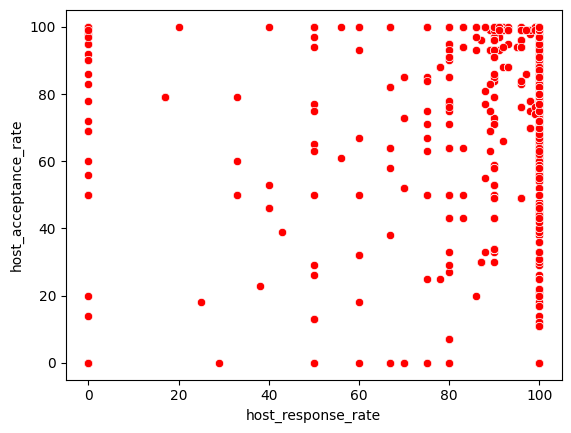

In [450]:
from turtle import color
# Entire home/apt
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=room1cali)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

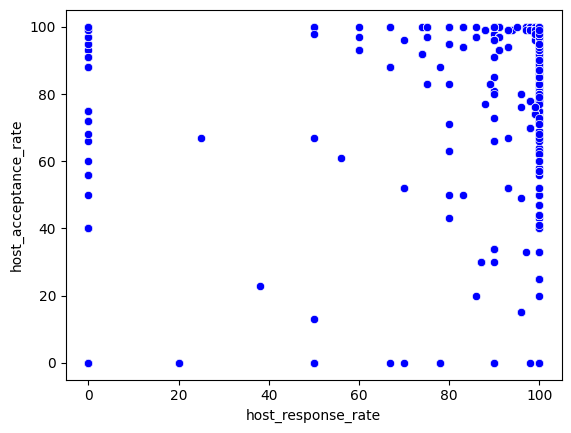

In [451]:
# Private room
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=room2cali)

In [452]:
#Declaramos las variables dependientes e independientes para la regresión lineal

#Entire home/apt
Vars1_Indep= room1cali[['host_response_rate']]
Var1_Dep= room1cali['host_acceptance_rate']

Vars1_Indep2= room1cali[['review_scores_cleanliness']]
Var1_Dep2= room1cali['review_scores_location']

Vars1_Indep3= room1cali[['price']]
Var1_Dep3= room1cali['host_acceptance_rate']

Vars1_Indep4= room1cali[['number_of_reviews']]
Var1_Dep4= room1cali['availability_365']

Vars1_Indep5= room1cali[['number_of_reviews']]
Var1_Dep5= room1cali['host_acceptance_rate']

Vars1_Indep6= room1cali[['review_scores_communication']]
Var1_Dep6= room1cali['reviews_per_month']

#Private room
Vars2_Indep= room2cali[['host_response_rate']]
Var2_Dep= room2cali['host_acceptance_rate']

Vars2_Indep2= room2cali[['review_scores_cleanliness']]
Var2_Dep2= room2cali['review_scores_location']

Vars2_Indep3= room2cali[['price']]
Var2_Dep3= room2cali['host_acceptance_rate']

Vars2_Indep4= room2cali[['number_of_reviews']]
Var2_Dep4= room2cali['availability_365']

Vars2_Indep5= room2cali[['number_of_reviews']]
Var2_Dep5= room2cali['host_acceptance_rate']

Vars2_Indep6= room2cali[['review_scores_communication']]
Var2_Dep6= room2cali['reviews_per_month']

In [453]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1room1= LinearRegression()
model2room1= LinearRegression()
model3room1= LinearRegression()
model4room1= LinearRegression()
model5room1= LinearRegression()
model6room1= LinearRegression()
model1room2= LinearRegression()
model2room2= LinearRegression()
model3room2= LinearRegression()
model4room2= LinearRegression()
model5room2= LinearRegression()
model6room2= LinearRegression()


### Modelo 1 Room 1

In [454]:
model1room1.fit(X = Vars1_Indep, y = Var1_Dep)

LinearRegression()

In [455]:
model1room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.33732977]),
 'rank_': 1,
 'singular_': array([778.91421241]),
 'intercept_': 54.42412502384732}

Modelo matermático: 0.33732977x + 54.42412502384732





In [456]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room1.score(Vars1_Indep,Var1_Dep)

0.044125096939840014

In [457]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1room1.score(X=Vars1_Indep, y=Var1_Dep)
coef_Deter1

0.044125096939840014

In [458]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.21005974611962192

### Modelo 2 Room 1

In [459]:
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'bfill')
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'ffill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'bfill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'ffill')

In [460]:

model2room1.fit(X = Vars1_Indep2, y = Var1_Dep2)

LinearRegression()

In [461]:
model2room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17722005]),
 'rank_': 1,
 'singular_': array([7.3866337]),
 'intercept_': 4.026526593117685}

Modelo matermático: 0.17722005x + 4.026526593117685

In [462]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room1.score(Vars1_Indep2,Var1_Dep2)

0.037153717035861344

In [463]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2room1.score(X=Vars1_Indep2, y=Var1_Dep2)
coef_Deter2

0.037153717035861344

In [464]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.19275299488169137

### Modelo 3 Room 1

In [465]:
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'bfill')
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'ffill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'bfill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'ffill')

In [466]:

model3room1.fit(X = Vars1_Indep3, y = Var1_Dep3)

LinearRegression()

In [467]:
model3room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00646584]),
 'rank_': 1,
 'singular_': array([16164.97308817]),
 'intercept_': 88.64074838671097}

Modelo matermático: -0.00646584x + 88.64074838671097

In [468]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room1.score(Vars1_Indep3,Var1_Dep3)

0.006982276982391289

In [469]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3room1.score(X=Vars1_Indep3, y=Var1_Dep3)
coef_Deter3

0.006982276982391289

In [470]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.08356002023929439

### Modelo 4 Room 1

In [471]:
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'bfill')
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'ffill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'bfill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'ffill')

In [472]:

model4room1.fit(X = Vars1_Indep4, y = Var1_Dep4)

LinearRegression()

In [473]:
model4room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.38054431]),
 'rank_': 1,
 'singular_': array([1736.87825406]),
 'intercept_': 170.50042743307827}

Modelo matermático: -0.38054431x + 170.50042743307827

In [474]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room1.score(Vars1_Indep4,Var1_Dep4)

0.008143315534355877

In [475]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4room1.score(X=Vars1_Indep4, y=Var1_Dep4)
coef_Deter4

0.008143315534355877

In [476]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.09024032100095765

### Modelo 5 Room 1

In [477]:
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'bfill')
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'ffill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'bfill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'ffill')

In [478]:

model5room1.fit(X = Vars1_Indep5, y = Var1_Dep5)

LinearRegression()

In [479]:
model5room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07195903]),
 'rank_': 1,
 'singular_': array([1736.87825406]),
 'intercept_': 85.32343866943238}

Modelo matermático: 0.07195903x + 85.32343866943238

In [480]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room1.score(Vars1_Indep5,Var1_Dep5)

0.009984043487329397

In [481]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5room1.score(X=Vars1_Indep5, y=Var1_Dep5)
coef_Deter5

0.009984043487329397

In [482]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.09992018558494273

### Modelo 6 Room 1

In [483]:
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'bfill')
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'ffill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'bfill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'ffill')

In [484]:

model6room1.fit(X = Vars1_Indep6, y = Var1_Dep6)

LinearRegression()

In [485]:
model6room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.41016908]),
 'rank_': 1,
 'singular_': array([2.8906071]),
 'intercept_': 12.573371000972367}

Modelo matermático: -2.41016908x + 12.573371000972367

In [486]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room1.score(Vars1_Indep6,Var1_Dep6)

0.035047276243729386

In [487]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6room1.score(X=Vars1_Indep6, y=Var1_Dep6)
coef_Deter6

0.035047276243729386

In [488]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.18720917777643645

### Modelo 1 Room 2

In [489]:
Vars2_Indep = Vars2_Indep.fillna(method = 'bfill')
Vars2_Indep = Vars2_Indep.fillna(method = 'ffill')
Var2_Dep = Var2_Dep.fillna(method = 'bfill')
Var2_Dep = Var2_Dep.fillna(method = 'ffill')

In [490]:

model1room2.fit(X = Vars2_Indep, y = Var2_Dep)

LinearRegression()

In [491]:
model1room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.13833977]),
 'rank_': 1,
 'singular_': array([894.79800336]),
 'intercept_': 76.50577833991221}

Modelo matermático: 0.13833977x + 76.50577833991221

In [492]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room2.score(Vars2_Indep,Var2_Dep)

0.018779293972829514

In [493]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model1room2.score(X=Vars2_Indep, y=Var2_Dep)
coef_Deter7

0.018779293972829514

In [494]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.13703756409404508

### Modelo 2 Room 2

In [495]:
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'bfill')
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'ffill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'bfill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'ffill')

In [496]:

model2room2.fit(X = Vars2_Indep2, y = Var2_Dep2)

LinearRegression()

In [497]:
model2room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.20628465]),
 'rank_': 1,
 'singular_': array([6.39971443]),
 'intercept_': 3.861942847711276}

Modelo matermático: 0.20628465x + 3.861942847711276

In [498]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room2.score(Vars2_Indep2,Var2_Dep2)

0.05899237079459063

In [499]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model2room2.score(X=Vars2_Indep2, y=Var2_Dep2)
coef_Deter8

0.05899237079459063

In [500]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.24288345105130285

### Modelo 3 Room 2

In [501]:
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'bfill')
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'ffill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'bfill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'ffill')

In [502]:

model3room2.fit(X = Vars2_Indep3, y = Var2_Dep3)

LinearRegression()

In [503]:
model3room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00060825]),
 'rank_': 1,
 'singular_': array([78829.77421204]),
 'intercept_': 89.59109544456412}

Modelo matermático: -0.00060825x + 89.59109544456412

In [504]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room2.score(Vars2_Indep3,Var2_Dep3)

0.0028176446387909726

In [505]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model3room2.score(X=Vars2_Indep3, y=Var2_Dep3)
coef_Deter9

0.0028176446387909726

In [506]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.053081490547939335

### Modelo 4 Room 2

In [507]:
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'bfill')
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'ffill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'bfill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'ffill')

In [508]:

model4room2.fit(X = Vars2_Indep4, y = Var2_Dep4)

LinearRegression()

In [509]:
model4room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.24817775]),
 'rank_': 1,
 'singular_': array([1398.86489717]),
 'intercept_': 174.0897402113587}

Modelo matermático: -0.24817775x + 174.0897402113587

In [510]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room2.score(Vars2_Indep4,Var2_Dep4)

0.003585298270561532

In [511]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model4room2.score(X=Vars2_Indep4, y=Var2_Dep4)
coef_Deter10

0.003585298270561532

In [512]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.059877360250444676

### Modelo 5 Room 2

In [513]:
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'bfill')
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'ffill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'bfill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'ffill')

In [514]:
model5room2.fit(X = Vars2_Indep5, y = Var2_Dep5)

LinearRegression()

In [515]:
model5room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.09192368]),
 'rank_': 1,
 'singular_': array([1398.86489717]),
 'intercept_': 86.87859647341516}

Modelo matermático: 0.09192368x + 86.87859647341516

In [516]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room2.score(Vars2_Indep5,Var2_Dep5)

0.020264760181131547

In [517]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter11=model5room2.score(X=Vars2_Indep5, y=Var2_Dep5)
coef_Deter11

0.020264760181131547

In [518]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl11=np.sqrt(coef_Deter11)
coef_Correl11

0.14235434725055482

### Modelo 6 Room 2

In [519]:
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'bfill')
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'ffill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'bfill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'ffill')

In [520]:

model6room2.fit(X = Vars2_Indep6, y = Var2_Dep6)

LinearRegression()

In [521]:
model6room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.21211834]),
 'rank_': 1,
 'singular_': array([2.50302662]),
 'intercept_': 11.689325766996982}

Modelo matermático: -2.21211834x + 11.689325766996982

In [522]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room2.score(Vars2_Indep6,Var2_Dep6)

0.03161138108806605

In [523]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter12=model6room2.score(X=Vars2_Indep6, y=Var2_Dep6)
coef_Deter12

0.03161138108806605

In [524]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl12=np.sqrt(coef_Deter12)
coef_Correl12

0.17779589727568532

In [525]:
datos = {'Determinación': [coef_Deter1, coef_Deter2, coef_Deter3, coef_Deter4, coef_Deter5, coef_Deter6, coef_Deter7, coef_Deter8, coef_Deter9, coef_Deter10, coef_Deter11, coef_Deter12], 'Correlación': [coef_Correl1, coef_Correl2, coef_Correl3, coef_Correl4, coef_Correl5, coef_Correl6, coef_Correl7, coef_Correl8, coef_Correl9, coef_Correl10, coef_Correl11, coef_Correl12]}
cali = pd.DataFrame(datos)
cali

,Determinación,Correlación
0,0.044125,0.210060
1,0.037154,0.192753
2,0.006982,0.083560
3,0.008143,0.090240
4,0.009984,0.099920
5,0.035047,0.187209
6,0.018779,0.137038
7,0.058992,0.242883
8,0.002818,0.053081
9,0.003585,0.059877


## Girona

Primero voy a quitar mis signos de pesos y mis diagonales, para poder convertirlo a un float.

In [526]:
girona1.price= girona1.price.replace({'\$':''}, regex = True)
girona1.price= girona1.price.replace({'\,':''}, regex = True)
girona1['price'] = girona1['price'].astype(float)

Para ambos rates, le quitamos el % para poder trabajarlo como número.

In [527]:
girona1.host_acceptance_rate= girona1.host_acceptance_rate.replace({'%':''}, regex = True)
girona1['host_acceptance_rate'] = girona1['host_acceptance_rate'].astype(float)

girona1.host_response_rate= girona1.host_response_rate.replace({'%':''}, regex = True)
girona1['host_response_rate'] = girona1['host_response_rate'].astype(float)

Elegimos los 2 tipos de habitacion a analizar

In [528]:
room1giro = girona1[girona1['room_type'] == 'Entire home/apt']
room2giro = girona1[girona1['room_type'] == 'Private room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

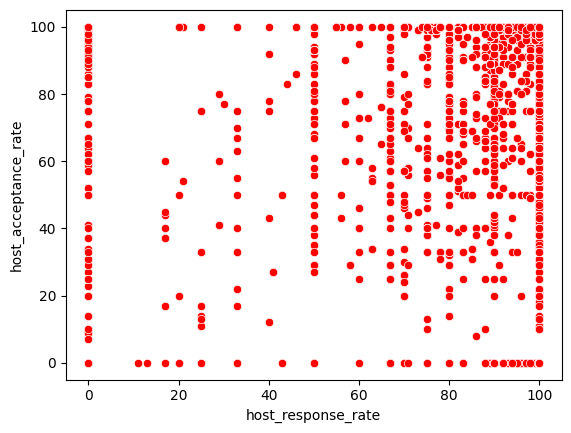

In [529]:
from turtle import color
# Entire home/apt
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=room1giro)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

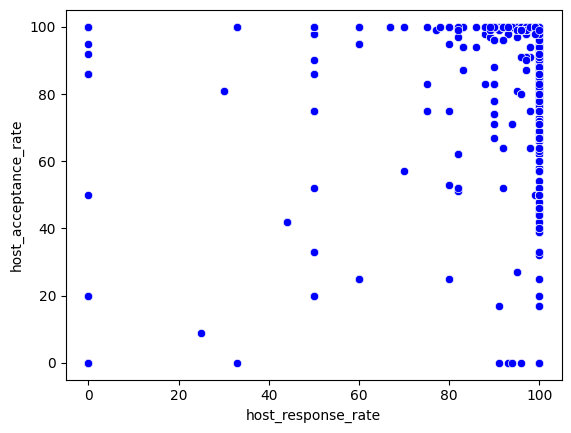

In [530]:
# Private room
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="blue", data=room2giro)

In [531]:
#Declaramos las variables dependientes e independientes para la regresión lineal

#Entire home/apt
Vars1_Indep= room1giro[['host_response_rate']]
Var1_Dep= room1giro['host_acceptance_rate']

Vars1_Indep2= room1giro[['review_scores_cleanliness']]
Var1_Dep2= room1giro['review_scores_location']

Vars1_Indep3= room1giro[['price']]
Var1_Dep3= room1giro['host_acceptance_rate']

Vars1_Indep4= room1giro[['number_of_reviews']]
Var1_Dep4= room1giro['availability_365']

Vars1_Indep5= room1giro[['number_of_reviews']]
Var1_Dep5= room1giro['host_acceptance_rate']

Vars1_Indep6= room1giro[['review_scores_communication']]
Var1_Dep6= room1giro['reviews_per_month']

#Private room
Vars2_Indep= room2giro[['host_response_rate']]
Var2_Dep= room2giro['host_acceptance_rate']

Vars2_Indep2= room2giro[['review_scores_cleanliness']]
Var2_Dep2= room2giro['review_scores_location']

Vars2_Indep3= room2giro[['price']]
Var2_Dep3= room2giro['host_acceptance_rate']

Vars2_Indep4= room2giro[['number_of_reviews']]
Var2_Dep4= room2giro['availability_365']

Vars2_Indep5= room2giro[['number_of_reviews']]
Var2_Dep5= room2giro['host_acceptance_rate']

Vars2_Indep6= room2giro[['review_scores_communication']]
Var2_Dep6= room2giro['reviews_per_month']

In [532]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1room1= LinearRegression()
model2room1= LinearRegression()
model3room1= LinearRegression()
model4room1= LinearRegression()
model5room1= LinearRegression()
model6room1= LinearRegression()
model1room2= LinearRegression()
model2room2= LinearRegression()
model3room2= LinearRegression()
model4room2= LinearRegression()
model5room2= LinearRegression()
model6room2= LinearRegression()


### Modelo 1 Room 1

In [533]:
model1room1.fit(X = Vars1_Indep, y = Var1_Dep)

LinearRegression()

In [534]:
model1room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.36482005]),
 'rank_': 1,
 'singular_': array([2143.02070638]),
 'intercept_': 55.86723658816872}

Modelo matermático: 0.36482005x + 55.86723658816872





In [535]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room1.score(Vars1_Indep,Var1_Dep)

0.07924544935317779

In [536]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1room1.score(X=Vars1_Indep, y=Var1_Dep)
coef_Deter1

0.07924544935317779

In [537]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.28150568263034725

### Modelo 2 Room 1

In [538]:
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'bfill')
Vars1_Indep2 = Vars1_Indep2.fillna(method = 'ffill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'bfill')
Var1_Dep2 = Var1_Dep2.fillna(method = 'ffill')

In [539]:

model2room1.fit(X = Vars1_Indep2, y = Var1_Dep2)

LinearRegression()

In [540]:
model2room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08723465]),
 'rank_': 1,
 'singular_': array([37.3174751]),
 'intercept_': 4.443042775470416}

Modelo matermático: 0.08723465x + 4.443042775470416

In [541]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room1.score(Vars1_Indep2,Var1_Dep2)

0.028011952962581077

In [542]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2room1.score(X=Vars1_Indep2, y=Var1_Dep2)
coef_Deter2

0.028011952962581077

In [543]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.16736771780298934

### Modelo 3 Room 1

In [544]:
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'bfill')
Vars1_Indep3 = Vars1_Indep3.fillna(method = 'ffill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'bfill')
Var1_Dep3 = Var1_Dep3.fillna(method = 'ffill')

In [545]:

model3room1.fit(X = Vars1_Indep3, y = Var1_Dep3)

LinearRegression()

In [546]:
model3room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00038631]),
 'rank_': 1,
 'singular_': array([74348.52627419]),
 'intercept_': 90.43523320128246}

Modelo matermático: -0.00038631 + 90.43523320128246

In [547]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room1.score(Vars1_Indep3,Var1_Dep3)

0.0001069504937371013

In [548]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3room1.score(X=Vars1_Indep3, y=Var1_Dep3)
coef_Deter3

0.0001069504937371013

In [549]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.010341687180392824

### Modelo 4 Room 1

In [550]:
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'bfill')
Vars1_Indep4 = Vars1_Indep4.fillna(method = 'ffill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'bfill')
Var1_Dep4 = Var1_Dep4.fillna(method = 'ffill')

In [551]:

model4room1.fit(X = Vars1_Indep4, y = Var1_Dep4)

LinearRegression()

In [552]:
model4room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17151119]),
 'rank_': 1,
 'singular_': array([1155.76624313]),
 'intercept_': 195.04544961414172}

Modelo matermático: 0.17151119x + 195.04544961414172

In [553]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room1.score(Vars1_Indep4,Var1_Dep4)

0.0001461724883219384

In [554]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4room1.score(X=Vars1_Indep4, y=Var1_Dep4)
coef_Deter4

0.0001461724883219384

In [555]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.012090181484243253

### Modelo 5 Room 1

In [556]:
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'bfill')
Vars1_Indep5 = Vars1_Indep5.fillna(method = 'ffill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'bfill')
Var1_Dep5 = Var1_Dep5.fillna(method = 'ffill')

In [557]:

model5room1.fit(X = Vars1_Indep5, y = Var1_Dep5)

LinearRegression()

In [558]:
model5room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00535216]),
 'rank_': 1,
 'singular_': array([1155.76624313]),
 'intercept_': 90.31692213687828}

Modelo matermático: 0.00535216x + 90.31692213687828

In [559]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room1.score(Vars1_Indep5,Var1_Dep5)

4.960928082442528e-06

In [560]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5room1.score(X=Vars1_Indep5, y=Var1_Dep5)
coef_Deter5

4.960928082442528e-06

In [561]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.002227314096045398

### Modelo 6 Room 1

In [562]:
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'bfill')
Vars1_Indep6 = Vars1_Indep6.fillna(method = 'ffill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'bfill')
Var1_Dep6 = Var1_Dep6.fillna(method = 'ffill')

In [563]:

model6room1.fit(X = Vars1_Indep6, y = Var1_Dep6)

LinearRegression()

In [564]:
model6room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.10486843]),
 'rank_': 1,
 'singular_': array([17.40900113]),
 'intercept_': 0.781666029284986}

Modelo matermático: -0.10486843x + 0.781666029284986

In [565]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room1.score(Vars1_Indep6,Var1_Dep6)

0.005453087160187664

In [566]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6room1.score(X=Vars1_Indep6, y=Var1_Dep6)
coef_Deter6

0.005453087160187664

In [567]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.07384502122816178

### Modelo 1 Room 2

In [568]:
Vars2_Indep = Vars2_Indep.fillna(method = 'bfill')
Vars2_Indep = Vars2_Indep.fillna(method = 'ffill')
Var2_Dep = Var2_Dep.fillna(method = 'bfill')
Var2_Dep = Var2_Dep.fillna(method = 'ffill')

In [569]:

model1room2.fit(X = Vars2_Indep, y = Var2_Dep)

LinearRegression()

In [570]:
model1room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.47046413]),
 'rank_': 1,
 'singular_': array([682.84151795]),
 'intercept_': 42.53912149418552}

Modelo matermático: 0.47046413x + 42.53912149418552

In [571]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model1room2.score(Vars2_Indep,Var2_Dep)

0.12728942382536634

In [572]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model1room2.score(X=Vars2_Indep, y=Var2_Dep)
coef_Deter7

0.12728942382536634

In [573]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.3567764339546074

### Modelo 2 Room 2

In [574]:
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'bfill')
Vars2_Indep2 = Vars2_Indep2.fillna(method = 'ffill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'bfill')
Var2_Dep2 = Var2_Dep2.fillna(method = 'ffill')

In [575]:

model2room2.fit(X = Vars2_Indep2, y = Var2_Dep2)

LinearRegression()

In [576]:
model2room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10873695]),
 'rank_': 1,
 'singular_': array([7.62217099]),
 'intercept_': 4.321967699627187}

Modelo matermático: 0.10873695x + 4.321967699627187

In [577]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2room2.score(Vars2_Indep2,Var2_Dep2)

0.030964352694970332

In [578]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model2room2.score(X=Vars2_Indep2, y=Var2_Dep2)
coef_Deter8

0.030964352694970332

In [579]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.17596690795422398

### Modelo 3 Room 2

In [580]:
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'bfill')
Vars2_Indep3 = Vars2_Indep3.fillna(method = 'ffill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'bfill')
Var2_Dep3 = Var2_Dep3.fillna(method = 'ffill')

In [581]:

model3room2.fit(X = Vars2_Indep3, y = Var2_Dep3)

LinearRegression()

In [582]:
model3room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00193771]),
 'rank_': 1,
 'singular_': array([21523.16403207]),
 'intercept_': 85.91931836762117}

Modelo matermático: 4.321967699627187x + 85.91931836762117

In [583]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3room2.score(Vars2_Indep3,Var2_Dep3)

0.0021453042194657934

In [584]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model3room2.score(X=Vars2_Indep3, y=Var2_Dep3)
coef_Deter9

0.0021453042194657934

In [585]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.046317428895241944

### Modelo 4 Room 2

In [586]:
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'bfill')
Vars2_Indep4 = Vars2_Indep4.fillna(method = 'ffill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'bfill')
Var2_Dep4 = Var2_Dep4.fillna(method = 'ffill')

In [587]:

model4room2.fit(X = Vars2_Indep4, y = Var2_Dep4)

LinearRegression()

In [588]:
model4room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10331076]),
 'rank_': 1,
 'singular_': array([327.35357587]),
 'intercept_': 210.8454425991971}

Modelo matermático: 0.10331076x + 210.8454425991971

In [589]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4room2.score(Vars2_Indep4,Var2_Dep4)

5.854960156559397e-05

In [590]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model4room2.score(X=Vars2_Indep4, y=Var2_Dep4)
coef_Deter10

5.854960156559397e-05

In [591]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.007651771139128115

### Modelo 5 Room 2

In [592]:
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'bfill')
Vars2_Indep5 = Vars2_Indep5.fillna(method = 'ffill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'bfill')
Var2_Dep5 = Var2_Dep5.fillna(method = 'ffill')

In [593]:
model5room2.fit(X = Vars2_Indep5, y = Var2_Dep5)

LinearRegression()

In [594]:
model5room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.2343285]),
 'rank_': 1,
 'singular_': array([327.35357587]),
 'intercept_': 84.82339351501516}

Modelo matermático: 0.2343285x + 84.82339351501516

In [595]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5room2.score(Vars2_Indep5,Var2_Dep5)

0.007257446791906097

In [596]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter11=model5room2.score(X=Vars2_Indep5, y=Var2_Dep5)
coef_Deter11

0.007257446791906097

In [597]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl11=np.sqrt(coef_Deter11)
coef_Correl11

0.08519064967416376

### Modelo 6 Room 2

In [598]:
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'bfill')
Vars2_Indep6 = Vars2_Indep6.fillna(method = 'ffill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'bfill')
Var2_Dep6 = Var2_Dep6.fillna(method = 'ffill')

In [599]:

model6room2.fit(X = Vars2_Indep6, y = Var2_Dep6)

LinearRegression()

In [600]:
model6room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.33529568]),
 'rank_': 1,
 'singular_': array([3.6654807]),
 'intercept_': 1.9303446334970897}

Modelo matermático: -0.33529568x + 1.9303446334970897

In [601]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6room2.score(Vars2_Indep6,Var2_Dep6)

0.03637975787363268

In [602]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter12=model6room2.score(X=Vars2_Indep6, y=Var2_Dep6)
coef_Deter12

0.03637975787363268

In [603]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl12=np.sqrt(coef_Deter12)
coef_Correl12

0.19073478412086423

In [604]:
datos = {'Determinación': [coef_Deter1, coef_Deter2, coef_Deter3, coef_Deter4, coef_Deter5, coef_Deter6, coef_Deter7, coef_Deter8, coef_Deter9, coef_Deter10, coef_Deter11, coef_Deter12], 'Correlación': [coef_Correl1, coef_Correl2, coef_Correl3, coef_Correl4, coef_Correl5, coef_Correl6, coef_Correl7, coef_Correl8, coef_Correl9, coef_Correl10, coef_Correl11, coef_Correl12]}
gir = pd.DataFrame(datos)
gir

,Determinación,Correlación
0,0.079245,0.281506
1,0.028012,0.167368
2,0.000107,0.010342
3,0.000146,0.012090
4,0.000005,0.002227
5,0.005453,0.073845
6,0.127289,0.356776
7,0.030964,0.175967
8,0.002145,0.046317
9,0.000059,0.007652
